In [1]:
pip install gradio

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

import pickle
import numpy as np
import pandas as pd
import os

In [3]:
from google.colab import files
uploaded = files.upload()

Saving input.txt to input.txt


**Load and Preprocess the data**

In [4]:
file = open("input.txt" , "r" , encoding = "utf8")

# storing file in list
lines = []
for i in file:
    lines.append(i)

# Converting list to string
data  = ""
for i in lines:
    data = ' '.join(lines)

# replacing unnecessary stuff with space
data = data.replace('\n' ,  ' ').replace('\r', ' ').replace('\ufeff' , ' ').replace('“', ' ').replace('”', ' ' )

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'difficulty word find . rhf experience sudden onset word find difficulty slurred speech evening 2/19/96 . deny associate dysphagia , diplopia , numbness weakness extremity . go sleep symptom 2/19/96 , awake 2/20/96 . awake headache mild neck stiffness . take shower neck stiffness resolve . day continue difficulty word finding worsen slurred speech . evening , begin experience numbness weakness low right face . feel rubber - band wrap tongue . 3 week prior presentation , experience transient episo'

check the length of the data used for pre-processinng


In [5]:
len(data)

339435

**Apply Tokenization:**

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl' , 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[35, 266, 192, 470, 130, 851, 423, 266, 192, 35, 1012, 114, 1237, 4, 609]

In [7]:
len(sequence_data)

45341

In [8]:
vocab_size = len(tokenizer.word_index) +  1
print(vocab_size)

5898


In [9]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The length of the sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The length of the sequences are:  45338


array([[  35,  266,  192,  470],
       [ 266,  192,  470,  130],
       [ 192,  470,  130,  851],
       [ 470,  130,  851,  423],
       [ 130,  851,  423,  266],
       [ 851,  423,  266,  192],
       [ 423,  266,  192,   35],
       [ 266,  192,   35, 1012],
       [ 192,   35, 1012,  114],
       [  35, 1012,  114, 1237]])

In [10]:
X =[]
Y =[]
for i in sequences:
    X.append(i[0:3])
    Y.append(i[3])

X = np.array(X)
Y = np.array(Y)

In [11]:
print("Data:   ", X[:10])
print("Response:   ", Y[:10])

Data:    [[  35  266  192]
 [ 266  192  470]
 [ 192  470  130]
 [ 470  130  851]
 [ 130  851  423]
 [ 851  423  266]
 [ 423  266  192]
 [ 266  192   35]
 [ 192   35 1012]
 [  35 1012  114]]
Response:    [ 470  130  851  423  266  192   35 1012  114 1237]


In [12]:
Y = to_categorical(Y, num_classes = vocab_size)
Y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Creating the model**

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))

#feeding it into the LSTM layer
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))

#Defining  our neural network pattern
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             58980     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 5898)              5903898   
                                                                 
Total params: 19011878 (72.52 MB)
Trainable params: 19011878 (72.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Plotting our model**
*to know the detailed visual representation*

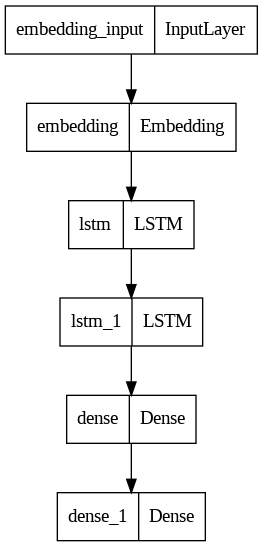

In [15]:
from tensorflow import keras
from keras.utils import plot_model
# Plotting the model for understanding
keras.utils.plot_model(model, to_file = 'plot.png', show_layer_names = True)

# Building our model

In [ ]:
#Training the Model

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy" , optimizer=Adam(learning_rate=0.001))
model.fit(X, Y, epochs=15, batch_size=64, callbacks=[checkpoint])

Epoch 1/15
119/709 [====>.........................] - ETA: 6:03 - loss: 8.0663

# Prediction

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

#loading the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)
    preds = np. argmax(model.predict(sequence))
    predicted_word = ""

    for key, value in tokenizer.word_index.items():
        if value == preds:
            predicted_word = key
            break

    #print(predicted_word)
    return predicted_word

# *Output:*

In [ ]:
"""
def greet(text):
    if text == "0":
        return "Execution completed!"
    else:
        try:
            words = text.split(" ")
            words = words[-3:]
            generated_text = " ".join(words)  # Simplified example
            generated_text = Predict_Next_Words(model, tokenizer, text)
            return generated_text
        except Exception as e:
            return f"Error occurred: {e}"
"""


def greet(text):
    if text.strip() == "0":
        return "Execution completed!"
    else:
        try:
            words = text.split(" ")
            words = words[-3:]
            generated_text = Predict_Next_Words(model, tokenizer, text)
            new_text = text +" "+generated_text
            return new_text
            return new_text, new_text
        except Exception as e:
            return f"Error occurred: {e}", state

In [ ]:
import gradio as gr

In [ ]:
# Create a Gradio interface
iface = gr.Interface(
    fn=greet,
    inputs=gr.Textbox(lines=2, placeholder="Enter your line from the text file:"),
    outputs=gr.Textbox()
)

# Launch the interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6527fca88531bf1fe1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
